# Greek parsing

In [153]:
from pathlib import Path
import numpy as np
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list, fcluster
from scipy.spatial.distance import squareform

import textdistance

In [154]:
from urllib import request

In [155]:
stop_words = request.urlopen("https://raw.githubusercontent.com/stopwords-iso/stopwords-el/master/raw/stop-words-greek.txt").read().decode("utf8").split("\r")
stop_words = [stop_word.strip() for stop_word in stop_words if len(stop_word.strip()) > 0]

In [157]:
# Load the greek text
greek_text = dict()
for file in Path("texts/sblgnt/").glob("*.txt"):
    book = file.name.split("-")[1]
    split_text = file.read_text(encoding="utf8").split("\n")
    text = ""
    for line in split_text:
        if line:
            word = line.split(" ")[-1]
#             if word not in stop_words:
            text += word + " "
    greek_text[book] = text

In [160]:
# Load the greek text
greek_text = dict()
for file in Path("texts/sblgnt/").glob("*.txt"):
    book = file.name.split("-")[1]
    split_text = file.read_text(encoding="utf8").split("\n")
    text = ""
    for line in split_text:
        if line:
            word = line.split(" ")[-1]
#             if word not in stop_words:
            text += word + " "
    greek_text[book] = text

# Function to plot only a list of books

In [1]:
pastoral_epistles = ["1Tim", "2Tim","Tit"]
deutero_epistles = ["Eph", "Col", "2Th"]
paul_epistles = ["Ga", "Php", "1Th", "Phm", "Ro", "2Co","1Co"]
not_paul_epistles = ["1Pe", "2Pe", "Jas", "Jud", "Heb"]

gospels = ["Mk", "Lk", "Mt", "Jn"]
acts = ["Ac", "Rev"]
john_episles = ["1Jn", "2Jn", "3Jn"]

In [141]:
def plot_dendogram(book_list, distance, t):
    jaccard = np.zeros(shape=(len(book_list), len(book_list)))
    books = {k: v for k, v in greek_text.items() if k in book_list}
    for ix_1, (book_1, text_1) in enumerate(books.items()):
        for ix_2, (book_2, text_2) in enumerate(books.items()):
            jaccard[ix_1, ix_2] = 1 - distance(text_1.split(" "), text_2.split(" "))
    
    # Calculate the distance between each sample
    Z = linkage(squareform(jaccard), method="ward")
    book_labels = [book_list[ix] for ix in leaves_list(Z)]
    # Plot with Custom leaves
    dendrogram(Z, leaf_rotation=90, leaf_font_size=20, labels=book_labels, color_threshold=t)
    [i.set_color("red") for i in plt.gca().get_xticklabels() if i.get_text() in paul_epistles]
    [i.set_color("green") for i in plt.gca().get_xticklabels() if i.get_text() in not_paul_epistles]
    [i.set_color("blue") for i in plt.gca().get_xticklabels() if i.get_text() in deutero_epistles]
    [i.set_color("orange") for i in plt.gca().get_xticklabels() if i.get_text() in pastoral_epistles]
    [i.set_color("pink") for i in plt.gca().get_xticklabels() if i.get_text() in gospels]
    [i.set_color("purple") for i in plt.gca().get_xticklabels() if i.get_text() in acts]
    [i.set_color("yellow") for i in plt.gca().get_xticklabels() if i.get_text() in john_episles]
    plt.title(f"Distance between epistles")
    plt.show()

In [142]:
def find_common_words(book_list):
    books = [greek_text[book].split(" ") for book in book_list]
    texts = {book: text for book, text in greek_text.items() if book in book_list}
    common_words = set(books[0]).intersection(*books[1:])
    detailed_dict = dict()
    summed_dict = dict()
    for word in common_words:
        if len(word) > 1:
            detailed_dict[word] = dict()
            summed_dict[word] = 0
            for title, text in texts.items():
                summed_dict[word] += text.count(word)
                detailed_dict[word].update({title: text.count(word)})
    return summed_dict, detailed_dict

def find_uncommon_words(book_list):
    books = [greek_text[book].split(" ") for book in book_list]
    texts = {book: text for book, text in greek_text.items() if book in book_list}
    common_words = set(books[0]).symmetric_difference(*books)
    detailed_dict = dict()
    summed_dict = dict()
    for word in common_words:
        if len(word) > 1:
            detailed_dict[word] = dict()
            summed_dict[word] = 0
            for title, text in texts.items():
                summed_dict[word] += text.count(word)
                detailed_dict[word].update({title: text.count(word)})
    return summed_dict, detailed_dict

In [143]:
def get_words_clusters(book_list, distance, t):
    jaccard = np.zeros(shape=(len(book_list), len(book_list)))
    books = {k: v for k, v in greek_text.items() if k in book_list}
    for ix_1, (book_1, text_1) in enumerate(books.items()):
        for ix_2, (book_2, text_2) in enumerate(books.items()):
            jaccard[ix_1, ix_2] = 1 - distance(text_1.split(" "), text_2.split(" "))
    # Calculate the distance between each sample
    Z = linkage(squareform(jaccard), method='ward')
    clusters = fcluster(Z, t, criterion="distance")
    words_per_cluster = dict()
    print(f"======== Number of clusters: {max(clusters)} =============")
    for cluster in np.unique(clusters):
        books_in_cluster = np.array(book_list)[clusters == cluster]
        summed_dict, _ = find_common_words(books_in_cluster)
        words_per_cluster[cluster] = {k: v for k, v in sorted(summed_dict.items(), key=lambda item: item[1], reverse=True)}
    return words_per_cluster

In [144]:
def get_clusters(book_list, distance, t):
    jaccard = np.zeros(shape=(len(book_list), len(book_list)))
    books = {k: v for k, v in greek_text.items() if k in book_list}
    for ix_1, (book_1, text_1) in enumerate(books.items()):
        for ix_2, (book_2, text_2) in enumerate(books.items()):
            jaccard[ix_1, ix_2] = 1 - distance(text_1.split(" "), text_2.split(" "))
    # Calculate the distance between each sample
    Z = linkage(squareform(jaccard), 'complete')
    clusters = fcluster(Z, t, criterion="distance")
    book_per_cluster = dict()
    print(f"======== Number of clusters: {max(clusters)} =============")
    for cluster in np.unique(clusters):
        book_per_cluster[cluster] =  np.array(book_list)[clusters == cluster]
    return book_per_cluster

Red --- Pauline
Green --- Not Pauline
Blue --- Deutero Pauline
Orange --- Pastoral Pauline


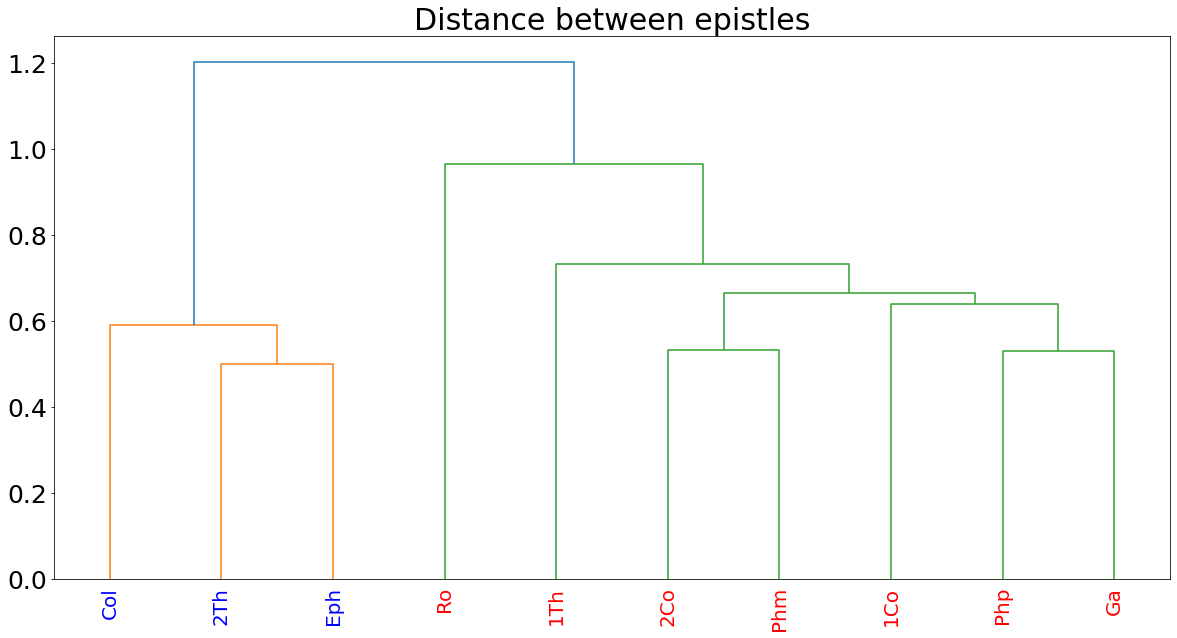

In [145]:
print("Red --- Pauline")
print("Green --- Not Pauline")
print("Blue --- Deutero Pauline")
print("Orange --- Pastoral Pauline")

plot_dendogram(deutero_epistles + paul_epistles, distance=textdistance.jaccard, t=1)


Red --- Pauline
Green --- Not Pauline
Blue --- Deutero Pauline
Orange --- Pastoral Pauline


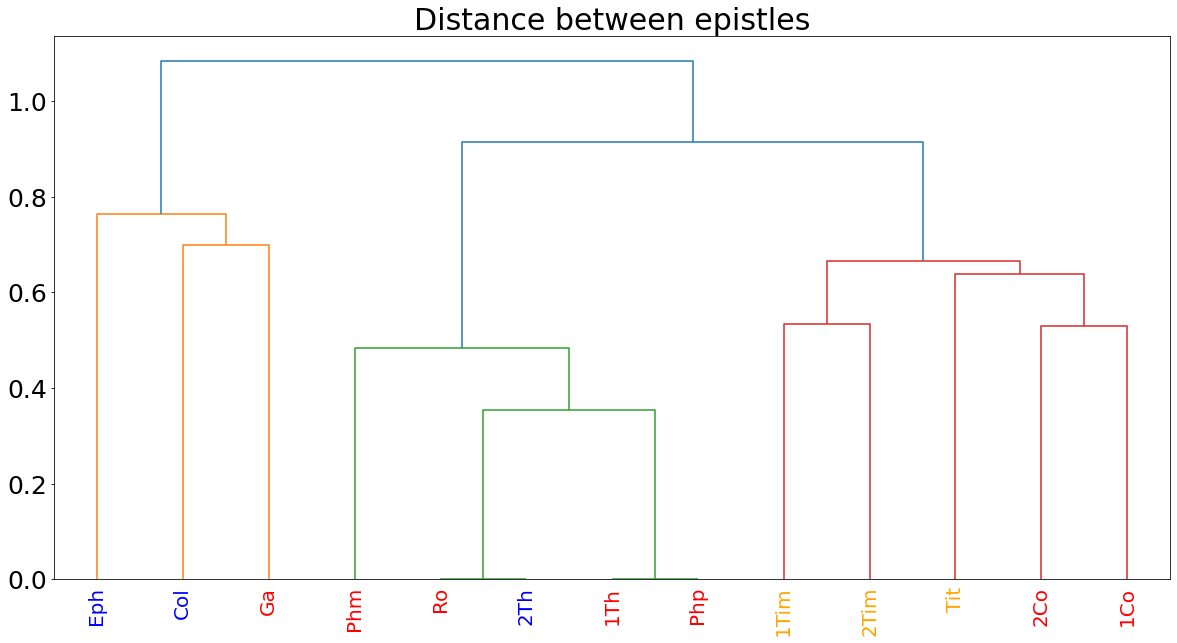

In [152]:
print("Red --- Pauline")
print("Green --- Not Pauline")
print("Blue --- Deutero Pauline")
print("Orange --- Pastoral Pauline")

plot_dendogram(pastoral_epistles + deutero_epistles + paul_epistles, distance=textdistance.jaccard, t=0.8)


In [119]:
get_clusters(deutero_epistles + paul_epistles + pastoral_epistles , distance=textdistance.jaccard, t=.6)

======== Number of clusters: 7 =============


{1: array(['2Co'], dtype='<U4'),
 2: array(['1Co'], dtype='<U4'),
 3: array(['1Tim'], dtype='<U4'),
 4: array(['Eph', 'Col', '2Th', '2Tim', 'Tit'], dtype='<U4'),
 5: array(['Php', 'Phm'], dtype='<U4'),
 6: array(['1Th', 'Ro'], dtype='<U4'),
 7: array(['Ga'], dtype='<U4')}

In [83]:
deutero_epistles

['Eph', 'Col', '2Th']

In [77]:
paul_epistles

['Ga', 'Php', '1Th', 'Phm', 'Ro', '2Co', '1Co']